# Introducción a clustering jerárquico

Usaremos los siguientes datos de temblores, considerando solamente las variables latitud y longitud.

In [52]:
%autosave 0
import pandas as pd
import plotnine
from plotnine import ggplot, aes, geom_point, theme_classic, coord_equal
temblores = pd.read_csv("../datos/quakes.csv").rename(columns = {"depth":"profundidad"})
temblores.describe()

Autosave disabled


,lat,long,profundidad,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-20.642750,179.462020,311.371000,4.620400,33.418000
std,5.028791,6.069497,215.535498,0.402773,21.900386
min,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,-17.637500,183.200000,543.000000,4.900000,42.000000
max,-10.720000,188.130000,680.000000,6.400000,132.000000


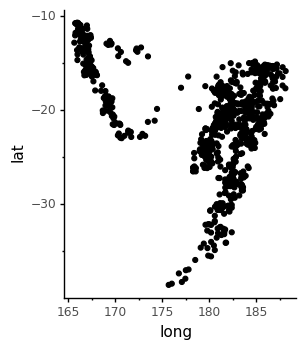

In [55]:
## Pregunta: por qué usar coord_equal en esta grafica 
plotnine.options.figure_size = (3, 2)
(ggplot(temblores, aes("long", "lat"))
  + geom_point() + coord_equal() + theme_classic()).draw();

## 1. Liga sencilla 

Muestra las soluciones de 2 a 5 grupos usando liga sencilla o simple

In [104]:
from sklearn.cluster import AgglomerativeClustering
# numero de grupos
num_grupos = 2
# definir método
agrupador = AgglomerativeClustering(n_clusters = num_grupos, affinity = 'euclidean', linkage = "single")
# aplicar a los datos
X = temblores[["long", "lat"]]
grupos = agrupador.fit_predict(X)
# añadir a dataframe
temblores["grupo"] = pd.Series(grupos).astype("category")
pd.Series(grupos).value_counts()

0    795
1    205
dtype: int64

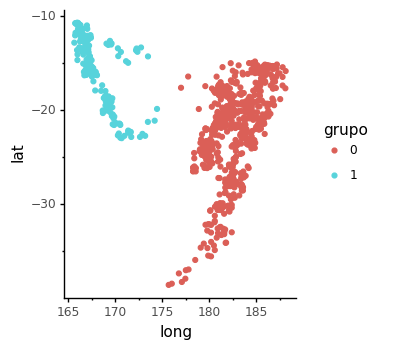

In [105]:
(ggplot(temblores, aes("long", "lat", colour = "grupo"))
  + geom_point() + theme_classic() + coord_equal()).draw();

## 2. Liga completa

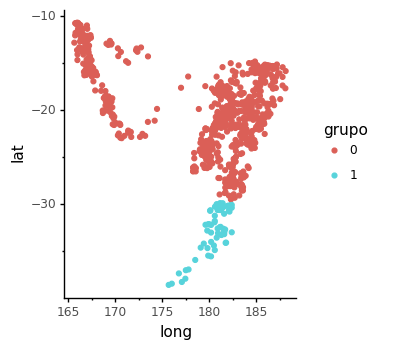

In [78]:
# para no repetir hacemos una función que ajusta y grafica:
def ajusta_graf(df, tipo_liga, num_grupos):
    agrupador = AgglomerativeClustering(n_clusters = num_grupos, affinity = 'euclidean', linkage = tipo_liga)
    # aplicar a los datos
    X = df[["long", "lat"]]
    grupos = agrupador.fit_predict(X)
    # añadir a dataframe
    temblores["grupo"] = pd.Series(grupos).astype("category")
    (ggplot(temblores, aes("long", "lat", colour = "grupo"))
      + geom_point() + theme_classic() + coord_equal()).draw();
    return grupos

grupos = ajusta_graf(temblores, "complete", 2)

## 3. Liga promedio

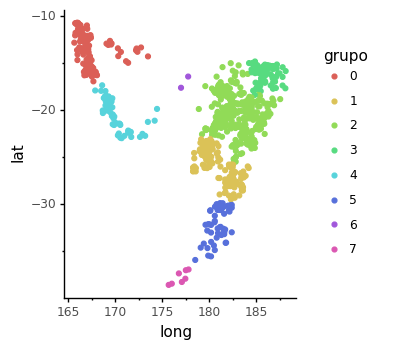

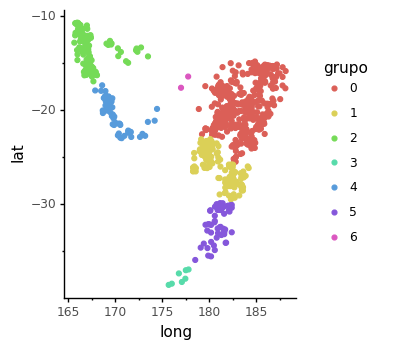

In [82]:
grupos = ajusta_graf(temblores, "average", 8)

## 4. Liga de ward

0    310
2    151
1    136
7    111
5     94
6     88
3     69
4     41
dtype: int64

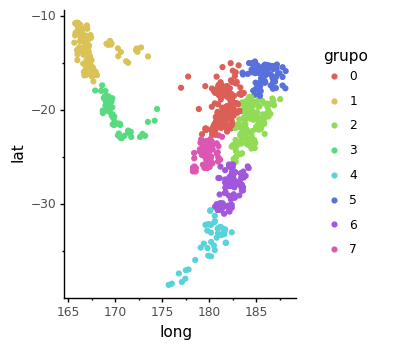

In [87]:
grupos = ajusta_graf(temblores, "ward", 8)

## Discusión

- ¿Qué métodos producen grupos desbalanceados? ¿Por qué?
- ¿Qué métodos producen grupos compactos en el sentido usual?
- Piensa en una posible aplicación de estos datos (o alguna similar). ¿Qué método piensas que podría ser más útil?